c:\users\laptop\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:261: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.

c:\users\laptop\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:266: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.

c:\users\laptop\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:271: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.

c:\users\laptop\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:276: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently sque

Text(0.5, 0.98, 'Continent-Wise Tested Positive & Negative Percentage Composition')

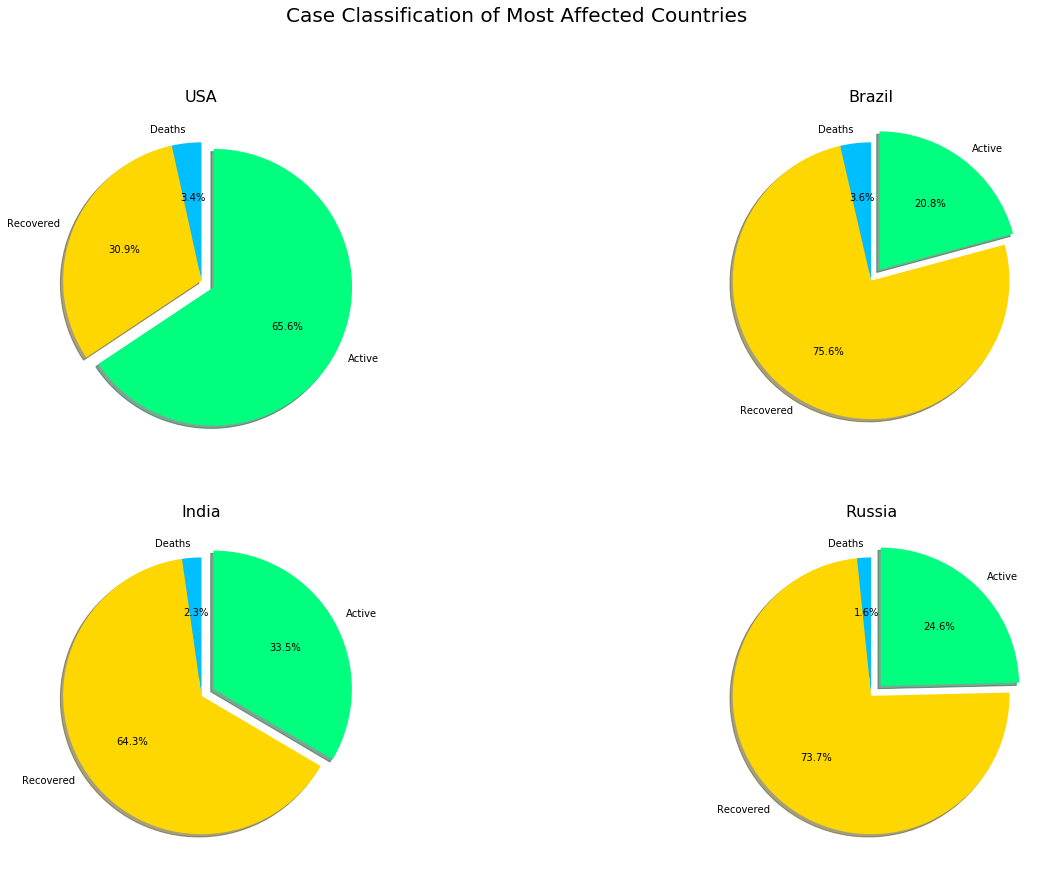

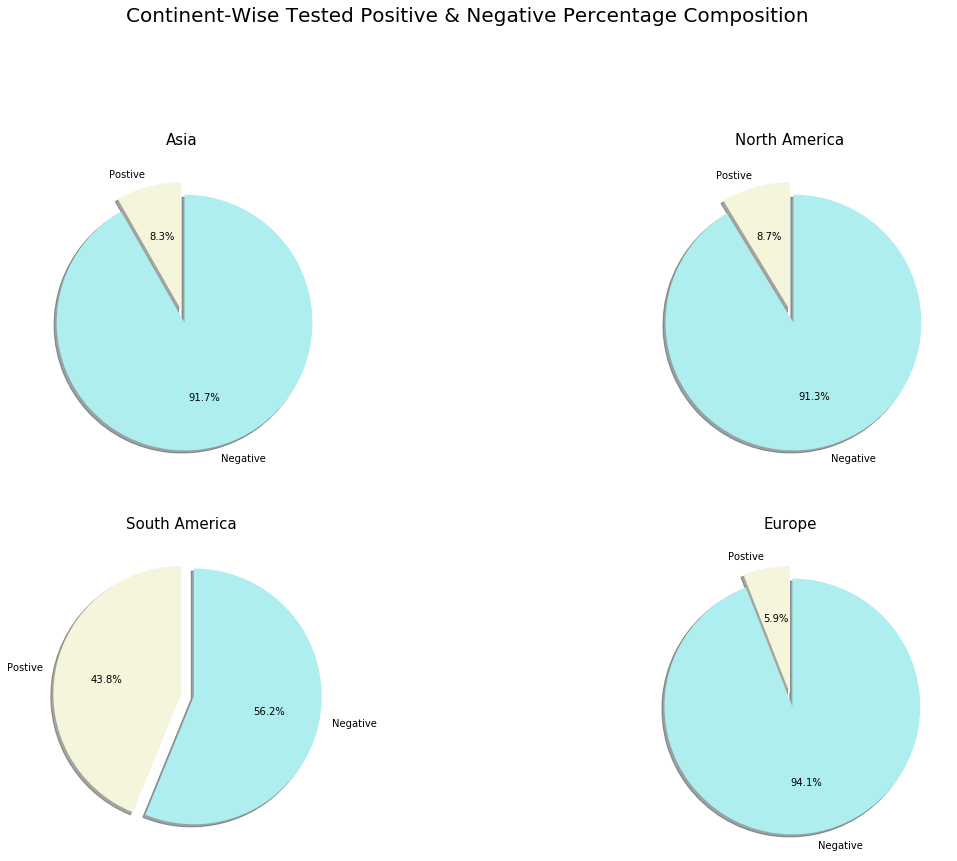

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
import numpy as np
import plotly
import plotly.graph_objects as go
import datetime as dt
import requests
from plotly.subplots import make_subplots

# Getting Data

url_request = requests.get("https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/Coronavirus_2019_nCoV_Cases/FeatureServer/1/query?where=1%3D1&outFields=*&outSR=4326&f=json")
url_json = url_request.json()
df = pd.DataFrame(url_json['features'])
df['attributes'][0]

# Data Wrangling

# a. transforming data

data_list = df['attributes'].tolist()
data = pd.DataFrame(data_list)
data.set_index('OBJECTID')
data = data[['Province_State','Country_Region','Last_Update','Lat','Long_','Confirmed','Recovered','Deaths','Active']]
data.columns = ('State','Country','Last Update','Lat','Long','Confirmed','Recovered','Deaths','Active')
data['State'].fillna(value = '', inplace = True)
data

# b. cleaning data

def convert_time(t):
    t = int(t)
    return dt.datetime.fromtimestamp(t)

data = data.dropna(subset = ['Last Update'])
data['Last Update'] = data['Last Update']/1000
data['Last Update'] = data['Last Update'].apply(convert_time)
data

# Exploratory Data Analysis & Visualization

# Our analysis contains ranking countries and provinces, , Time Series and classification and distribution

# 1. Ranking countries and provinces
# a. Top 10 confirmed countries (Bubble plot)

top10_confirmed = pd.DataFrame(data.groupby('Country')['Confirmed'].sum().nlargest(10).sort_values(ascending = False))
fig1 = px.scatter(top10_confirmed, x = top10_confirmed.index, y = 'Confirmed', size = 'Confirmed', size_max = 170,
                color = top10_confirmed.index, title = 'Top 10 Confirmed Cases Countries')
fig1.show()

# b. Top 10 deaths countries (h-Bar plot)

top10_deaths = pd.DataFrame(data.groupby('Country')['Deaths'].sum().nlargest(10).sort_values(ascending = True))
fig2 = px.bar(top10_deaths, x = 'Deaths', y = top10_deaths.index, height = 600, color = 'Deaths', orientation = 'h',
            color_continuous_scale = ['deepskyblue','red'], title = 'Top 10 Death Cases Countries')
fig2.show()

# c. Top 10 recovered countries (Bar plot)

top10_recovered = pd.DataFrame(data.groupby('Country')['Recovered'].sum().nlargest(10).sort_values(ascending = False))
fig3 = px.bar(top10_recovered, x = top10_recovered.index, y = 'Recovered', height = 600, color = 'Recovered',
             title = 'Top 10 Recovered Cases Countries', color_continuous_scale = px.colors.sequential.Viridis)
fig3.show()

# d. Top 10 active countries

top10_active = pd.DataFrame(data.groupby('Country')['Active'].sum().nlargest(10).sort_values(ascending = True))
fig4 = px.bar(top10_active, x = 'Active', y = top10_active.index, height = 600, color = 'Active', orientation = 'h',
             color_continuous_scale = ['paleturquoise','blue'], title = 'Top 10 Active Cases Countries')
fig4.show()

# e. Most affected states/provinces in largely affected countries
# Here we are going to extract top 4 affected countries' states data and plot it!

# Firstly, aggregating data with our dataset :
# USA
topstates_us = data['Country'] == 'US'
topstates_us = data[topstates_us].nlargest(5, 'Confirmed')
# Brazil
topstates_brazil = data['Country'] == 'Brazil'
topstates_brazil = data[topstates_brazil].nlargest(5, 'Confirmed')
# India
topstates_india = data['Country'] == 'India'
topstates_india = data[topstates_india].nlargest(5, 'Confirmed')
# Russia
topstates_russia = data['Country'] == 'Russia'
topstates_russia = data[topstates_russia].nlargest(5, 'Confirmed')

# Let's plot!
# USA 
fig5 = go.Figure(data = [
    go.Bar(name = 'Active Cases', x = topstates_us['Active'], y = topstates_us['State'], orientation = 'h'),
    go.Bar(name = 'Death Cases', x = topstates_us['Deaths'], y = topstates_us['State'], orientation = 'h')
])
fig5.update_layout(title = 'Most Affected States in USA', height = 600)
fig5.show()
# Brazil
fig6 = go.Figure(data = [
    go.Bar(name = 'Recovered Cases', x = topstates_brazil['State'], y = topstates_brazil['Recovered']),
    go.Bar(name = 'Active Cases', x = topstates_brazil['State'], y = topstates_brazil['Active']),
    go.Bar(name = 'Death Cases', x = topstates_brazil['State'], y = topstates_brazil['Deaths'])
])
fig6.update_layout(title = 'Most Affected States in Brazil', barmode = 'stack', height = 600)
fig6.show()
# India
fig7 = go.Figure(data = [
    go.Bar(name = 'Recovered Cases', x = topstates_india['State'], y = topstates_india['Recovered']),
    go.Bar(name = 'Active Cases', x = topstates_india['State'], y = topstates_india['Active']),
    go.Bar(name = 'Death Cases', x = topstates_india['State'], y = topstates_india['Deaths'])
])
fig7.update_layout(title = 'Most Affected States in India', barmode = 'stack', height = 600)
fig7.show()
# Russia
fig8 = go.Figure(data = [
    go.Bar(name = 'Recovered Cases', x = topstates_russia['State'], y = topstates_russia['Recovered']),
    go.Bar(name = 'Active Cases', x = topstates_russia['State'], y = topstates_russia['Active']),
    go.Bar(name = 'Death Cases', x = topstates_russia['State'], y = topstates_russia['Deaths'])
])
fig8.update_layout(title = 'Most Affected States in Russia', barmode = 'stack', height = 600)
fig8.show()

# 2. Time series of top affected countries
# We need a new data for this plot 
# https://covid19.who.int/ follow the link for this link for the next dataset(you can find the download option on the bottomright of the map chart)
time_series = pd.read_csv('who_data.csv', encoding = 'ISO-8859-1')
time_series['Date_reported'] = pd.to_datetime(time_series['Date_reported'])

# a. Covid-19 cases worldwide
# Firsty Data
time_series_dates = time_series.groupby('Date_reported').sum()

# Let's Plot
# Cumulative cases
fig11 = go.Figure()
fig11.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates[' Cumulative_cases'], fill = 'tonexty',
                          line_color = 'blue'))
fig11.update_layout(title = 'Cumulative Cases Worldwide')
fig11.show()
# Cumulative death cases
fig12 = go.Figure()
fig12.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates[' Cumulative_deaths'], fill = 'tonexty',
                          line_color = 'red'))
fig12.update_layout(title = 'Cumulative Deaths Worldwide')
fig12.show()
# Daily new cases
fig13 = go.Figure()
fig13.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates[' New_cases'], fill = 'tonexty',
                          line_color = 'gold'))
fig13.update_layout(title = 'Daily New Cases Worldwide')
fig13.show()
# Daily death cases
fig14 = go.Figure()
fig14.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates[' New_deaths'], fill = 'tonexty',
                          line_color = 'hotpink'))
fig14.update_layout(title = 'Daily Death Cases Worldwide')
fig14.show()

# b. Most Affected Countries over the time
# Data
# USA 
time_series_us = time_series[' Country'] == ('United States of America')
time_series_us = time_series[time_series_us]
# Brazil
time_series_brazil = time_series[' Country'] == ('Brazil')
time_series_brazil = time_series[time_series_brazil]
# India
time_series_india = time_series[' Country'] == ('India')
time_series_india = time_series[time_series_india]
# Russia
time_series_russia = time_series[' Country'] == ('Russia')
time_series_russia = time_series[time_series_russia]
# Peru
time_series_peru = time_series[' Country'] == ('Peru')
time_series_peru = time_series[time_series_peru]

# Let's plot
# Cumulative cases
fig15 = go.Figure()
fig15.add_trace(go.Line(x = time_series_us['Date_reported'], y = time_series_us[' Cumulative_cases'], name = 'USA'))
fig15.add_trace(go.Line(x = time_series_brazil['Date_reported'], y = time_series_brazil[' Cumulative_cases'], name = 'Brazil'))
fig15.add_trace(go.Line(x = time_series_india['Date_reported'], y = time_series_india[' Cumulative_cases'], name = 'India'))
fig15.add_trace(go.Line(x = time_series_russia['Date_reported'], y = time_series_russia[' Cumulative_cases'], name = 'Russia'))
fig15.add_trace(go.Line(x = time_series_peru['Date_reported'], y = time_series_peru[' Cumulative_cases'], name = 'Peru'))
fig15.update_layout(title = 'Time Series of Most Affected countries"s Cumulative Cases')
fig15.show()
# Cumulative death cases
fig16 = go.Figure()
fig16.add_trace(go.Line(x = time_series_us['Date_reported'], y = time_series_us[' Cumulative_deaths'], name = 'USA'))
fig16.add_trace(go.Line(x = time_series_brazil['Date_reported'], y = time_series_brazil[' Cumulative_deaths'], name = 'Brazil'))
fig16.add_trace(go.Line(x = time_series_india['Date_reported'], y = time_series_india[' Cumulative_deaths'], name = 'India'))
fig16.add_trace(go.Line(x = time_series_russia['Date_reported'], y = time_series_russia[' Cumulative_deaths'], name = 'Russia'))
fig16.add_trace(go.Line(x = time_series_peru['Date_reported'], y = time_series_peru[' Cumulative_deaths'], name = 'Peru'))
fig16.update_layout(title = 'Time Series of Most Affected countries"s Cumulative Death Cases')
fig16.show()
# Daily new cases
fig17 = go.Figure()
fig17.add_trace(go.Line(x = time_series_us['Date_reported'], y = time_series_us[' New_cases'], name = 'USA'))
fig17.add_trace(go.Line(x = time_series_brazil['Date_reported'], y = time_series_brazil[' New_cases'], name = 'Brazil'))
fig17.add_trace(go.Line(x = time_series_india['Date_reported'], y = time_series_india[' New_cases'], name = 'India'))
fig17.add_trace(go.Line(x = time_series_russia['Date_reported'], y = time_series_russia[' New_cases'], name = 'Russia'))
fig17.add_trace(go.Line(x = time_series_peru['Date_reported'], y = time_series_peru[' New_cases'], name = 'Peru'))
fig17.update_layout(title = 'Time Series of Most Affected countries"s Daily New Cases')
fig17.show()
# Daily death cases
fig18 = go.Figure()
fig18.add_trace(go.Line(x = time_series_us['Date_reported'], y = time_series_us[' New_deaths'], name = 'USA'))
fig18.add_trace(go.Line(x = time_series_brazil['Date_reported'], y = time_series_brazil[' New_deaths'], name = 'Brazil'))
fig18.add_trace(go.Line(x = time_series_india['Date_reported'], y = time_series_india[' New_deaths'], name = 'India'))
fig18.add_trace(go.Line(x = time_series_russia['Date_reported'], y = time_series_russia[' New_deaths'], name = 'Russia'))
fig18.add_trace(go.Line(x = time_series_peru['Date_reported'], y = time_series_peru[' New_deaths'], name = 'Peru'))
fig18.update_layout(title = 'Time Series of Most Affected countries"s Daily Death Cases')
fig18.show()

# 3. Case Classification and Distribution

# For this we need a new dataset 
# https://www.kaggle.com/imdevskp/corona-virus-report follow this link for the next dataset

# a. WHO Region-Wise Distribution
# For this plot we are going to use country_wise_latest dataset which will come along with the downloaded kaggle dataset
# Firstly Data
who = pd.read_csv('country_wise_latest.csv')
who_region = pd.DataFrame(who.groupby('WHO Region')['Confirmed'].sum())
labels = who_region.index
values = who_region['Confirmed']
# Let's Plot!
fig9 = go.Figure(data=[go.Pie(labels = labels, values = values, pull=[0, 0, 0, 0, 0.2, 0])])
fig9.update_layout(title = 'WHO Region-Wise Case Distribution', width = 800, height = 500, 
                   margin = dict(t = 25, l = 25, r = 25, b = 25))
fig9.show()

# b. Most Affected countries case distribution
# For this plot we are going to use the same country_wise_latest dataset

# Firstly Data
case_dist = who
# US
dist_us = case_dist['Country/Region'] == 'US'
dist_us = case_dist[dist_us][['Country/Region','Deaths','Recovered','Active']].set_index('Country/Region')
# Brazil
dist_brazil = case_dist['Country/Region'] == 'Brazil'
dist_brazil = case_dist[dist_brazil][['Country/Region','Deaths','Recovered','Active']].set_index('Country/Region')
# India
dist_india = case_dist['Country/Region'] == 'India'
dist_india = case_dist[dist_india][['Country/Region','Deaths','Recovered','Active']].set_index('Country/Region')
# Russia
dist_russia = case_dist['Country/Region'] == 'Russia'
dist_russia = case_dist[dist_russia][['Country/Region','Deaths','Recovered','Active']].set_index('Country/Region')

# Let's Plot!
# This plot is produced with matplotlib
fig = plt.figure(figsize = (22,14))
colors_series = ['deepskyblue','gold','springgreen','coral']
explode = (0,0,0.1)

plt.subplot(221)
plt.pie(dist_us, labels = dist_us.columns, colors = colors_series, explode = explode,startangle = 90,
        autopct = '%.1f%%', shadow = True)
plt.title('USA', fontsize = 16)

plt.subplot(222)
plt.pie(dist_brazil, labels = dist_brazil.columns, colors = colors_series, explode = explode,startangle = 90,autopct = '%.1f%%',
       shadow = True)
plt.title('Brazil', fontsize = 16)

plt.subplot(223)
plt.pie(dist_india, labels = dist_india.columns, colors = colors_series, explode = explode, startangle = 90, autopct = '%.1f%%',
       shadow = True)
plt.title('India', fontsize = 16)

plt.subplot(224)
plt.pie(dist_russia, labels = dist_russia.columns, colors = colors_series, explode = explode, startangle = 90,
        autopct = '%.1f%%', shadow = True)
plt.title('Russia', fontsize = 16)

plt.suptitle('Case Classification of Most Affected Countries', fontsize = 20)

# c. Most affected continents' negative case vs positive case percentage composition
# For this we need a new dataset 
# https://ourworldindata.org/coronavirus-source-data Follow this link for our next dataset

# Firstly Data
negative_positive = pd.read_csv('owid-covid-data.csv')
negative_positive = negative_positive.groupby('continent')[['total_cases','total_tests']].sum()
explode = (0,0.1)
labels = ['Postive','Negative']
colors = ['beige','paleturquoise']

#Let's Plot!
fig = plt.figure(figsize = (20,20))
plt.subplot(321)
plt.pie(negative_positive[negative_positive.index == 'Asia'],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('Asia', fontsize = 15)

plt.subplot(322)
plt.pie(negative_positive[negative_positive.index == 'North America'],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('North America', fontsize = 15)

plt.subplot(323)
plt.pie(negative_positive[negative_positive.index == 'South America'],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('South America', fontsize = 15)

plt.subplot(324)
plt.pie(negative_positive[negative_positive.index == 'Europe'],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('Europe', fontsize = 15)

plt.suptitle('Continent-Wise Tested Positive & Negative Percentage Composition', fontsize = 20)